# Pandas

Like spreadsheets in Microsoft Excel or dataframes in R, Pandas allows us to store our data in tabular, multi-dimensional objects (dataframes) with familiar features like rows, columns, and headers. This is useful because it makes management, manipulation, and cleaning of large datasets much easier than would be the case using Python's built-in data structures such as lists and dictionaries. Pandas also provides a wide range of useful tools for working with data once it has been stored and structured.

Notice that we load pandas with the usual `import pandas` and an extra `as pd` statement.  This allows us to call functions from `pandas` with `pd.<function>` instead of `pandas.<function>` for convenience.  `as pd` is **not** necessary to load the package.

Download the csv file <a href="https://github.com/UNC-Libraries-data/Python/raw/master/Jupyter/CountyHealthData_2014-2015.csv">CountyHealthData_2014-2015.csv</a>.  I've stored my copy in the same folder as this Jupyter Notebook.  Remember that Jupyter Notebooks automatically set your working directory to the folder where the .ipynb is saved.  You'll have to save the document at least once to set your directory, but once there you can use relative paths.

`pd.read_csv` reads the tabular data from a Comma Separated Values (csv) file into a `DataFrame` object.


In [5]:
import pandas as pd

df = pd.read_csv("CountyHealthData_2014-2015.csv")
#df = pd.read_csv("C:/Users/mtjansen/Desktop/Python/Jupyter/CountyHealthData_2014-2015.csv")

&nbsp;

## Exploring a DataFrame

### Attributes
A good first step in understanding our DataFrame is to examine some of its basic attributes. Attributes contain **values** that help us understand and use the dataframe. In pandas, we access attributes with the following syntax:
```
<DataFrame name>.<attribute name>
```

Here we us the `.shape` attribute to determine how many rows and columns (in that order) are available.

In [2]:
df.shape

(6109, 64)

&nbsp;

Other useful attributes include:
* `.columns` provides the column names for the DataFrame
* `.dtypes` provides the pandas datatype for each column

&nbsp;
&nbsp;
### Methods
Much of the functionality for working with dataframes comes in the form of methods.  Methods are specialized **functions** that only work for a certain type of object, with the syntax:
```
<object name>.<method>()
```

We can look at the first 5 or last 5 rows in the dataset directly with the `.head()` and `.tail()` methods.

In [3]:
df.head()

,State,Region,Division,County,FIPS,GEOID,SMS Region,Year,Premature death,Poor or fair health,...,Drug poisoning deaths,Uninsured adults,Uninsured children,Health care costs,Could not see doctor due to cost,Other primary care providers,Median household income,Children eligible for free lunch,Homicide rate,Inadequate social support
0,AK,West,Pacific,Aleutians West Census Area,2016,2016,Insuff Data,1/1/2014,NaN,0.122,...,NaN,0.374,0.250,3791.0,0.185,216.0,69192,0.127,NaN,0.287
1,AK,West,Pacific,Aleutians West Census Area,2016,2016,Insuff Data,1/1/2015,NaN,0.122,...,NaN,0.314,0.176,4837.0,0.185,254.0,74088,0.133,NaN,NaN
2,AK,West,Pacific,Anchorage Borough,2020,2020,Region 22,1/1/2014,6827.0,0.125,...,15.37,0.218,0.096,6588.0,0.119,135.0,71094,0.319,6.29,0.160
3,AK,West,Pacific,Anchorage Borough,2020,2020,Region 22,1/1/2015,6856.0,0.125,...,17.08,0.227,0.123,6582.0,0.119,148.0,76362,0.334,5.60,NaN
4,AK,West,Pacific,Bethel Census Area,2050,2050,Insuff Data,1/1/2014,13345.0,0.211,...,NaN,0.394,0.124,5860.0,0.200,169.0,41722,0.668,12.77,0.477


&nbsp;

We can also get basic summary statistics for each of our columns with the `.describe()` method. Normally, `.describe()` would only show us statistics for numeric columns, but we'll use an argument called "include" to summarize our categorical columns as well.

In [4]:
df.describe(include = "all").round(2) 
#.round(2) allows us to round all of our numbers by 2 decimal places.

,State,Region,Division,County,FIPS,GEOID,SMS Region,Year,Premature death,Poor or fair health,...,Drug poisoning deaths,Uninsured adults,Uninsured children,Health care costs,Could not see doctor due to cost,Other primary care providers,Median household income,Children eligible for free lunch,Homicide rate,Inadequate social support
count,6109,6109,6109,6109,6109.00,6109.00,6109,6109,5984.00,5424.00,...,4113.00,6109.00,6109.00,6105.00,4755.00,5979.00,6109.00,5835.00,2484.00,2427.00
unique,51,4,9,1830,NaN,NaN,30,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,TX,South,South Atlantic,Washington County,NaN,NaN,Insuff Data,1/1/2015,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,469,2803,1175,60,NaN,NaN,1608,3062,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,30322.71,30322.71,NaN,NaN,8029.29,0.17,...,13.61,0.21,0.08,9454.27,0.15,57.34,45401.81,0.43,6.31,0.19
std,NaN,NaN,NaN,NaN,15177.99,15177.99,NaN,NaN,2413.81,0.06,...,7.40,0.07,0.04,1550.57,0.06,45.71,11603.61,0.17,4.70,0.05
min,NaN,NaN,NaN,NaN,1001.00,1001.00,NaN,NaN,2398.00,0.04,...,2.32,0.04,0.01,3791.00,0.03,0.00,21572.00,0.00,0.60,0.00
25%,NaN,NaN,NaN,NaN,18163.00,18163.00,NaN,NaN,6351.50,0.13,...,8.67,0.16,0.06,8379.00,0.11,31.00,37588.00,0.31,3.20,0.16
50%,NaN,NaN,NaN,NaN,29133.00,29133.00,NaN,NaN,7707.50,0.17,...,11.99,0.21,0.08,9380.00,0.15,48.00,43479.00,0.42,5.08,0.19
75%,NaN,NaN,NaN,NaN,45067.00,45067.00,NaN,NaN,9374.25,0.21,...,16.61,0.26,0.10,10412.00,0.19,72.00,50884.00,0.54,8.00,0.22


&nbsp;

## Indexing

We'll often want to select certain rows or columns from a large dataframe. As with elements in a list, this can be accomplished using indexing. There are some limitations, however. For example, we can use numbers in square brackets to select certain rows, but doing so always returns all the columns in our dataset:

In [5]:
df[0:3]

,State,Region,Division,County,FIPS,GEOID,SMS Region,Year,Premature death,Poor or fair health,...,Drug poisoning deaths,Uninsured adults,Uninsured children,Health care costs,Could not see doctor due to cost,Other primary care providers,Median household income,Children eligible for free lunch,Homicide rate,Inadequate social support
0,AK,West,Pacific,Aleutians West Census Area,2016,2016,Insuff Data,1/1/2014,NaN,0.122,...,NaN,0.374,0.250,3791.0,0.185,216.0,69192,0.127,NaN,0.287
1,AK,West,Pacific,Aleutians West Census Area,2016,2016,Insuff Data,1/1/2015,NaN,0.122,...,NaN,0.314,0.176,4837.0,0.185,254.0,74088,0.133,NaN,NaN
2,AK,West,Pacific,Anchorage Borough,2020,2020,Region 22,1/1/2014,6827.0,0.125,...,15.37,0.218,0.096,6588.0,0.119,135.0,71094,0.319,6.29,0.160


&nbsp;

We can select rows for specific columns using the column names.

In [6]:
df["State"][5:10]

5    AK
6    AK
7    AK
8    AK
9    AK
Name: State, dtype: object

&nbsp;

If we want to select multiple columns, we must list them in their own nested set of square brackets.

In [7]:
df[["State", "Year", "County", "Uninsured adults"]][19:25]

,State,Year,County,Uninsured adults
19,AK,1/1/2015,Kodiak Island Borough,0.320
20,AK,1/1/2014,Lake and Peninsula Borough,0.434
21,AK,1/1/2015,Lake and Peninsula Borough,0.406
22,AK,1/1/2014,Matanuska-Susitna Borough,0.266
23,AK,1/1/2015,Matanuska-Susitna Borough,0.254
24,AK,1/1/2014,Nome Census Area,0.373


&nbsp;

Typing all those names out gets tiring after a while, though. What if we try to select a column by number instead? **Running the code below produces an error.** This is where the attributes `.iloc` and `.loc` become useful.

In [8]:
# df[1][0:3]

&nbsp;

### `.iloc`

If we use the `.iloc` attribute before our brackets, pandas accepts two numbers separated by a comma. The first number is for rows and the second for columns. Below, we select the second row and third column.

In [9]:
df.iloc[2,3]

'Anchorage Borough'

&nbsp;

We can also use a colon to select multiple rows or columns at once. Note the examples below.

In [10]:
df.iloc[:,3] # All rows of column 3

0       Aleutians West Census Area
1       Aleutians West Census Area
2                Anchorage Borough
3                Anchorage Borough
4               Bethel Census Area
                   ...            
6104                  Uinta County
6105               Washakie County
6106               Washakie County
6107                 Weston County
6108                 Weston County
Name: County, Length: 6109, dtype: object

&nbsp;



In [11]:
df.iloc[0:3,:] # Rows 0-2 of all columns

,State,Region,Division,County,FIPS,GEOID,SMS Region,Year,Premature death,Poor or fair health,...,Drug poisoning deaths,Uninsured adults,Uninsured children,Health care costs,Could not see doctor due to cost,Other primary care providers,Median household income,Children eligible for free lunch,Homicide rate,Inadequate social support
0,AK,West,Pacific,Aleutians West Census Area,2016,2016,Insuff Data,1/1/2014,NaN,0.122,...,NaN,0.374,0.250,3791.0,0.185,216.0,69192,0.127,NaN,0.287
1,AK,West,Pacific,Aleutians West Census Area,2016,2016,Insuff Data,1/1/2015,NaN,0.122,...,NaN,0.314,0.176,4837.0,0.185,254.0,74088,0.133,NaN,NaN
2,AK,West,Pacific,Anchorage Borough,2020,2020,Region 22,1/1/2014,6827.0,0.125,...,15.37,0.218,0.096,6588.0,0.119,135.0,71094,0.319,6.29,0.160


&nbsp;



In [12]:
df.iloc[120:126,2:8] # Rows 120-125 of columns 2-8

,Division,County,FIPS,GEOID,SMS Region,Year
120,East South Central,Lamar County,1075,1075,Region 16,1/1/2014
121,East South Central,Lamar County,1075,1075,Region 16,1/1/2015
122,East South Central,Lauderdale County,1077,1077,Region 16,1/1/2014
123,East South Central,Lauderdale County,1077,1077,Region 16,1/1/2015
124,East South Central,Lawrence County,1079,1079,Region 16,1/1/2014
125,East South Central,Lawrence County,1079,1079,Region 16,1/1/2015


&nbsp;

### `.loc`

The **i** in `iloc` stands for **integer**. If we still want to use the column names, we can use the `.loc` attribute instead.

In [13]:
df.loc[0:3,"Division"]

0    Pacific
1    Pacific
2    Pacific
3    Pacific
Name: Division, dtype: object

&nbsp;



In [14]:
df.loc[0:3,["State","County","Food environment index"]]

,State,County,Food environment index
0,AK,Aleutians West Census Area,7.002
1,AK,Aleutians West Census Area,6.600
2,AK,Anchorage Borough,8.185
3,AK,Anchorage Borough,8.000


&nbsp;

Indexing in pandas can also be combined with methods. What if we want to see how many records we have for each region in the dataset? We can do this by using the `.value_counts()` method and indexing our Region column.

In [15]:
df["Region"].value_counts()

South        2803
Midwest      2038
West          834
Northeast     434
Name: Region, dtype: int64

&nbsp;

Here, we'll use the `head()` method while indexing with .loc.

In [16]:
df.loc[:,["State","County","Health care costs"]].head()

,State,County,Health care costs
0,AK,Aleutians West Census Area,3791.0
1,AK,Aleutians West Census Area,4837.0
2,AK,Anchorage Borough,6588.0
3,AK,Anchorage Borough,6582.0
4,AK,Bethel Census Area,5860.0


### Indexing and Assignment

When we want to assign a value into a cell or region of our DataFrame, it's best practice to use the `.loc` or `.iloc` attributes to select a region of our dataset.  This ensures that when changes are made, they will flow back into the original DataFrame and not into a copy.  This is a particularly common problem when using multiple indices stacked on top of each other.  Unfortunately this problem is inherently unpredictable in Pandas, and can best be avoided by using the `.loc` and `.iloc` attributes.

Read more [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#why-does-assignment-fail-when-using-chained-indexing).

Try running the commented out code `ex["County"][0] = "New County"` below, after creating `ex`.  Both may work, but the commented version will throw a `SettingwithCopyWarning` warning and may sometimes fail.

In [17]:
ex = df.copy()

#Do this:
ex.loc[0,"County"] = "New County"

#NOT this:
#ex["County"][0] = "New County"

print(ex.loc[0,"County"])

New County


&nbsp;

### Filtering

To filter our dataset based on a logical condition (true or false), we will use nested square brackets. Note the example below.
* The inner statement, `df["State"]=="RI"` looks for a **column** name and checks if it equals "RI"
* The outer statement `df[ ... ]` uses the resulting column of True/Falue values to select **rows**
* When combined, these two commands call all of the data contained in rows where the value of the State field is equal to "RI"

In [18]:
df[df["State"] == "RI"]

,State,Region,Division,County,FIPS,GEOID,SMS Region,Year,Premature death,Poor or fair health,...,Drug poisoning deaths,Uninsured adults,Uninsured children,Health care costs,Could not see doctor due to cost,Other primary care providers,Median household income,Children eligible for free lunch,Homicide rate,Inadequate social support
4505,RI,Northeast,New England,Bristol County,44001,44001,Region 12,1/1/2014,4543.0,0.087,...,12.35,0.113,0.027,8579.0,0.077,18.0,64572,0.139,NaN,0.197
4506,RI,Northeast,New England,Bristol County,44001,44001,Region 12,1/1/2015,3891.0,0.087,...,11.67,0.110,0.044,8355.0,0.077,16.0,68415,0.155,NaN,NaN
4507,RI,Northeast,New England,Kent County,44003,44003,Region 12,1/1/2014,6313.0,0.122,...,15.55,0.110,0.027,9890.0,0.105,61.0,59682,0.223,1.44,0.187
4508,RI,Northeast,New England,Kent County,44003,44003,Region 12,1/1/2015,6458.0,0.122,...,18.94,0.114,0.046,9621.0,0.105,68.0,63232,0.230,1.30,NaN
4509,RI,Northeast,New England,Newport County,44005,44005,Region 12,1/1/2014,4457.0,0.109,...,12.29,0.119,0.033,8897.0,0.090,30.0,63434,0.222,NaN,0.176
4510,RI,Northeast,New England,Newport County,44005,44005,Region 12,1/1/2015,4730.0,0.109,...,10.33,0.118,0.048,8149.0,0.090,33.0,67291,0.230,NaN,NaN
4511,RI,Northeast,New England,Providence County,44007,44007,Region 12,1/1/2014,6468.0,0.154,...,15.67,0.190,0.049,9480.0,0.125,88.0,47601,0.484,4.10,0.229
4512,RI,Northeast,New England,Providence County,44007,44007,Region 12,1/1/2015,6124.0,0.154,...,17.51,0.182,0.058,8983.0,0.125,93.0,47642,0.487,3.70,NaN
4513,RI,Northeast,New England,Washington County,44009,44009,Region 12,1/1/2014,4961.0,0.092,...,10.56,0.105,0.031,8776.0,0.088,39.0,69150,0.172,NaN,0.157
4514,RI,Northeast,New England,Washington County,44009,44009,Region 12,1/1/2015,4939.0,0.092,...,13.18,0.107,0.047,8212.0,0.088,49.0,69267,0.177,NaN,NaN


#### `SettingwithCopyWarning` and filtered data

When we use the notation above to filter a DataFrame we may run into a `SettingwithCopyWarning` warning later on in our code if we save this object and then modify it later on.  That's because this notation creates a reference back to the original dataframe, **not** a copy of the original dataframe, unless we explicitly use the **`.copy()`** method.  If you want to use subset later on, you should create it as follows:

In [19]:
RI_subset = df[df["State"] == "RI"].copy()

&nbsp;

## Working Example: Mass Mobilization Data

### About the dataset

The Mass Mobilization project collects data on demonstrations against governments around the globe, covering protests in 162 countries from 1990 to 2020. The project is a collaboration between researchers from Binghamton University and the University of Notre Dame, and sponsored by the Political Instability Task Force (PITF) which is funded by the Central Intelligence Agency. For more information and links to all associated files, visit the [Harvard Dataverse](https://dataverse.harvard.edu/dataverse/MMdata?q=&types=dataverses%3Adatasets%3Afiles&sort=dateSort&order=desc&page=1). 

### Setup

**Download the CSV file: [protest_data.csv](https://unc-libraries-data.github.io/Python/Jupyter/protest_data.csv)**

*Be sure to put it in the same folder as your Jupyter Notebook or working directory.*

In [21]:
import pandas as pd

protests = pd.read_csv("protest_data.csv")

### Research Questions

Without any preparation or planning, trying to explore a dataset can be overwhelming, and you may find yourself unsure of where to begin. The first step to successful Exploratory Data Analysis (EDA) is developing a set of research questions. We will use the questions below to guide our research on the dataset. In some cases, we'll create visualizations to answer the questions.

1. What information has been collected about the protests in the dataset?
2. How many protests does our dataset include, and in which countries do they occur?
3. Are there any relationships between protest length, number of people, and whether or not there is violence?



### Question 1 : What information has been collected about the protests in the dataset?
Previously, we have used the `.describe()` method to view column names and get basic summary statistics. However, if we only want a quick list of column names, we can use the `list()` function on `protests.columns`.

In [30]:
list(protests.columns)

['id',
 'country',
 'ccode',
 'year',
 'region',
 'protest',
 'protestnumber',
 'startday',
 'startmonth',
 'startyear',
 'endday',
 'endmonth',
 'endyear',
 'protesterviolence',
 'location',
 'participants_category',
 'participants',
 'protesteridentity',
 'protesterdemand1',
 'protesterdemand2',
 'protesterdemand3',
 'protesterdemand4',
 'stateresponse1',
 'stateresponse2',
 'stateresponse3',
 'stateresponse4',
 'stateresponse5',
 'stateresponse6',
 'stateresponse7',
 'sources',
 'notes']

### Question 2 : How many protests does our dataset include and in which countries do they occur?

Finding the total number of protests is easy enough...

In [31]:
len(protests)

17145

But how can we find out how many protests occured in each country? 

Pandas provides a number of methods for aggregating our data, such as average, minimum, maximum, etc. In our case, we'll use `.count()` to tally up the total number of protest IDs. Often, we'll also want to aggregate our data within a certain group like country, region, etc. The method for grouping in Pandas is called `.groupby()`. To create groups and aggregate them at the same time, we'll need to use **chained methods**.

In [32]:
# The .copy() method allows us to create a  new copy of the dataframe instead of only referencing the original
Q2 = protests.groupby("country").count()["id"].copy()
Q2

country
Afghanistan     56
Albania         93
Algeria        122
Angola          38
Argentina      118
              ... 
Vietnam         36
Yemen          166
Yugoslavia     138
Zambia          99
Zimbabwe       119
Name: id, Length: 166, dtype: int64

Now that our `byCountry` object includes the count of protests for each country, there are many ways we can display the results. Maybe we'd like to see the top 5 countries with the most and least protests. Perhaps we can even **visualize** them.

First, let's find the top 5 countries with the most and least protests. The `.nlargest()` and `.nsmallest()` methods become useful here.

In [33]:
Q2top = Q2.nlargest(5)
Q2top

country
United Kingdom    578
France            547
Ireland           438
Germany           364
Kenya             353
Name: id, dtype: int64

In [34]:
Q2bot = Q2.nsmallest(5)
Q2bot

country
Germany West              2
Serbia and Montenegro     5
Czechoslovakia            6
South Sudan              10
Germany East             11
Name: id, dtype: int64

#### Visualization

There are many libraries for data visualization within Python. Some of the most popular include:

- Matplotlib (basic charts)
- Seaborn (extends the functionality of Matplotlib)
- Bokeh (interactive charts)
- Plot.ly (another library for interactive charts)

We'll be creating plots with each of these libraries to get an idea of how they work. Let's start with **matplotlib**. 

In [35]:
import matplotlib.pyplot as plt

# Below is a special function that allows matplotlib visualizations to display in Jupyter Notebooks
%matplotlib inline 

Note that we need to specify the `.index` and `.values` attributes of our pandas object to tell matplotlib what to use for the x axis of our chart and the height of our bars.

Text(0, 0.5, 'Total protests')

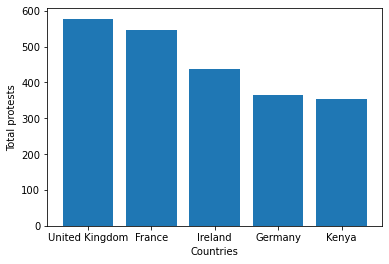

In [36]:
# Create a bar chart showing the top 5 countries with the most protests
plt.bar(x = Q2top.index, height = Q2top.values)
plt.xlabel("Countries")
plt.ylabel("Total protests")

Text(0, 0.5, 'Total protests')

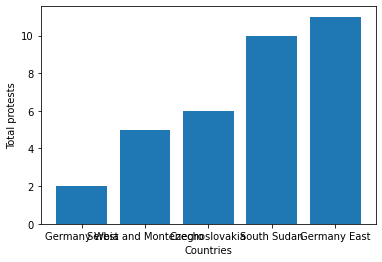

In [37]:
# Create a bar chart showing the top 5 countries with the least protests
plt.bar(x = Q2bot.index, height = Q2bot.values)
plt.xlabel("Countries")
plt.ylabel("Total protests")

Uh oh! Our country names are so long that they overlap one another. We could always make our chart larger, but why not use a horizontal bar chart instead? Then, we don't have to worry about the length of the labels on our bars.

This time, we'll use the `barh` method and specify the data for the y axis and bar widths.

Text(0.5, 0, 'Total protests')

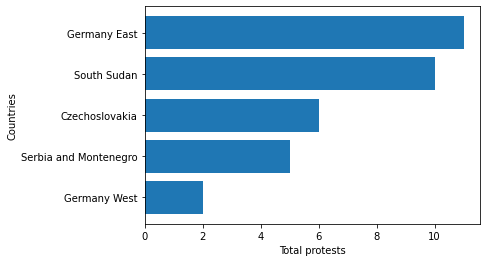

In [38]:
plt.barh(y = Q2bot.index, width = Q2bot.values)
plt.ylabel("Countries")
plt.xlabel("Total protests")

## Question 3: Are length and size of protests different in various regions of the world?

In [22]:
Q3 = protests[["region", 
               "startyear", "startmonth", "startday", 
               "endyear", "endmonth", "endday", 
               "participants"]].copy()
Q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17145 entries, 0 to 17144
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        17145 non-null  object 
 1   startyear     15239 non-null  float64
 2   startmonth    15239 non-null  float64
 3   startday      15239 non-null  float64
 4   endyear       15239 non-null  float64
 5   endmonth      15239 non-null  float64
 6   endday        15239 non-null  float64
 7   participants  15746 non-null  object 
dtypes: float64(6), object(2)
memory usage: 1.0+ MB


In [23]:
Q3["participants"]

0            1000s
1             1000
2              500
3             100s
4              950
           ...    
17140          50+
17141    About 100
17142          NaN
17143          NaN
17144          NaN
Name: participants, Length: 17145, dtype: object

In [25]:
Q3["participants"] = Q3["participants"].str.extract("(\d+)")
Q3["participants"]

0        1000
1        1000
2         500
3         100
4         950
         ... 
17140      50
17141     100
17142     NaN
17143     NaN
17144     NaN
Name: participants, Length: 17145, dtype: object

In [27]:
Q3 = Q3.dropna()
Q3.iloc[:,1:8] = Q3.iloc[:,1:8].astype("int64")
Q3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13988 entries, 0 to 17141
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   region        13988 non-null  object
 1   startyear     13988 non-null  int64 
 2   startmonth    13988 non-null  int64 
 3   startday      13988 non-null  int64 
 4   endyear       13988 non-null  int64 
 5   endmonth      13988 non-null  int64 
 6   endday        13988 non-null  int64 
 7   participants  13988 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 983.5+ KB


In [28]:
# create dictionaries that specify which columns represent years, months and days
startdict = dict(year = protests["startyear"], month = protests["startmonth"], day = protests["startday"])
enddict = dict(year = protests["endyear"], month = protests["endmonth"], day = protests["endday"])

# create columns for start and end dates
Q3["startdate"] = pd.to_datetime(startdict)
Q3["enddate"] = pd.to_datetime(enddict)

# preview the new columns
Q3[["startdate", "enddate"]].head()

,startdate,enddate
0,1990-01-15,1990-01-15
1,1990-06-25,1990-06-25
2,1990-07-01,1990-07-01
3,1990-07-12,1990-09-06
4,1990-08-14,1990-08-15


In [31]:
#subtract start date from end date and show the result as number of days
Q3["protestlength"] = Q3["enddate"] - Q3["startdate"]
Q3["protestlength"] = Q3["protestlength"].dt.days
Q3.head()

,region,startyear,startmonth,startday,endyear,endmonth,endday,participants,startdate,enddate,protestlength
0,North America,1990,1,15,1990,1,15,1000,1990-01-15,1990-01-15,0
1,North America,1990,6,25,1990,6,25,1000,1990-06-25,1990-06-25,0
2,North America,1990,7,1,1990,7,1,500,1990-07-01,1990-07-01,0
3,North America,1990,7,12,1990,9,6,100,1990-07-12,1990-09-06,56
4,North America,1990,8,14,1990,8,15,950,1990-08-14,1990-08-15,1


AttributeError: 'FacetGrid' object has no attribute 'ticklabel_format'

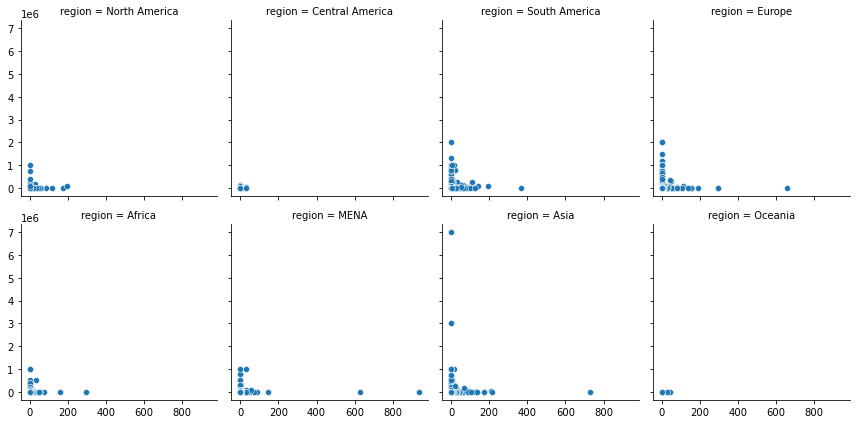

In [50]:
import seaborn as sns

grid = sns.FacetGrid(data = Q3, col="region", col_wrap = 4)
grid.map_dataframe(sns.scatterplot, x = "protestlength", y = "participants")
grid.ticklabel_format(axis = "both", style = "plain")

## Question 3: Are there any relationships between protest length, number of people, and whether or not there is violence?

In [69]:
Q3 = protests[["participants", 
               "startyear", "startmonth", "startday", 
               "endyear", "endmonth", "endday", 
               "protesterviolence"]].copy()
Q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17145 entries, 0 to 17144
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   participants       15746 non-null  object 
 1   startyear          15239 non-null  float64
 2   startmonth         15239 non-null  float64
 3   startday           15239 non-null  float64
 4   endyear            15239 non-null  float64
 5   endmonth           15239 non-null  float64
 6   endday             15239 non-null  float64
 7   protesterviolence  15758 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.0+ MB


In [70]:
Q3["participants"]

0            1000s
1             1000
2              500
3             100s
4              950
           ...    
17140          50+
17141    About 100
17142          NaN
17143          NaN
17144          NaN
Name: participants, Length: 17145, dtype: object

In [71]:
Q3["participants"] = Q3["participants"].str.extract("(\d+)")
Q3["participants"]

0        1000
1        1000
2         500
3         100
4         950
         ... 
17140      50
17141     100
17142     NaN
17143     NaN
17144     NaN
Name: participants, Length: 17145, dtype: object

In [72]:
Q3 = Q3.dropna().astype("int64")
Q3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13988 entries, 0 to 17141
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   participants       13988 non-null  int64
 1   startyear          13988 non-null  int64
 2   startmonth         13988 non-null  int64
 3   startday           13988 non-null  int64
 4   endyear            13988 non-null  int64
 5   endmonth           13988 non-null  int64
 6   endday             13988 non-null  int64
 7   protesterviolence  13988 non-null  int64
dtypes: int64(8)
memory usage: 983.5 KB


In [73]:
# create dictionaries that specify which columns represent years, months and days
startdict = dict(year = protests["startyear"], month = protests["startmonth"], day = protests["startday"])
enddict = dict(year = protests["endyear"], month = protests["endmonth"], day = protests["endday"])

# create columns for start and end dates
Q3["startdate"] = pd.to_datetime(startdict)
Q3["enddate"] = pd.to_datetime(enddict)

# preview the new columns
Q3[["startdate", "enddate"]].head()

,startdate,enddate
0,1990-01-15,1990-01-15
1,1990-06-25,1990-06-25
2,1990-07-01,1990-07-01
3,1990-07-12,1990-09-06
4,1990-08-14,1990-08-15


In [29]:
#subtract start date from end date and show the result as number of days
Q3["protestlength"] = Q3["enddate"] - Q3["startdate"]
Q3["protestlength"] = Q3["protestlength"].dt.days
Q3.head()

,region,startyear,startmonth,startday,endyear,endmonth,endday,participants,startdate,enddate,protestlength
0,North America,1990,1,15,1990,1,15,1000,1990-01-15,1990-01-15,0
1,North America,1990,6,25,1990,6,25,1000,1990-06-25,1990-06-25,0
2,North America,1990,7,1,1990,7,1,500,1990-07-01,1990-07-01,0
3,North America,1990,7,12,1990,9,6,100,1990-07-12,1990-09-06,56
4,North America,1990,8,14,1990,8,15,950,1990-08-14,1990-08-15,1


In [74]:
#subtract start date from end date and show the result as number of days
Q3["protestlength"] = Q3["enddate"] - Q3["startdate"]
Q3["protestlength"] = Q3["protestlength"].dt.days
Q3.head()

,participants,startyear,startmonth,startday,endyear,endmonth,endday,protesterviolence,startdate,enddate,protestlength
0,1000,1990,1,15,1990,1,15,0,1990-01-15,1990-01-15,0
1,1000,1990,6,25,1990,6,25,0,1990-06-25,1990-06-25,0
2,500,1990,7,1,1990,7,1,0,1990-07-01,1990-07-01,0
3,100,1990,7,12,1990,9,6,1,1990-07-12,1990-09-06,56
4,950,1990,8,14,1990,8,15,1,1990-08-14,1990-08-15,1


In [75]:
#change protesterviolence to boolean (true/false) data type
Q3["protesterviolence"] = Q3["protesterviolence"].astype(bool)

#select only the columns we need for visualization
Q3 = Q3[["participants", "protestlength", "protesterviolence"]]

Q3.head()

,participants,protestlength,protesterviolence
0,1000,0,False
1,1000,0,False
2,500,0,False
3,100,56,True
4,950,1,True


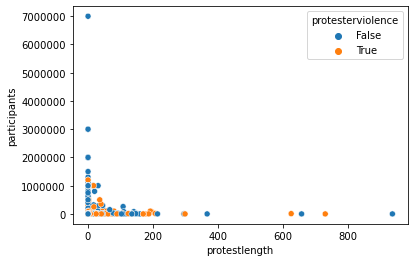

In [76]:
import seaborn as sns

Q3plt = sns.scatterplot(data = Q3, x = "protestlength", y = "participants", hue = "protesterviolence")
Q3plt.ticklabel_format(axis = "both", style = "plain")

In [80]:
protests["stateresponse1"].value_counts()

ignore             8239
crowd dispersal    3935
arrests            1088
accomodation        956
shootings           424
beatings            303
killings            263
Name: stateresponse1, dtype: int64

### Explore

Using summary statistics (average, minimum, maximum, etc.) are an essential part of exploring a dataset. When summarizing our data in pandas, we'll often want to aggregate our data within a certain group like state, region, diviision, etc. The `.groupby()` method allows us to do so. Below, we use **chained methods** to group our data by state before getting the average health care costs.

In [20]:
avgStCosts = df.groupby("State").mean()["Health care costs"]
avgStCosts.head()

State
AK     7103.239130
AL    10218.865672
AR     9671.146667
AZ     8622.733333
CA     8099.701754
Name: Health care costs, dtype: float64

&nbsp;

If we want to sort our list of states from highest to lowest health care costs, we'll need to use the `.sort_values()` method. Let's also use chained methods again to round our numbers.

In [21]:
avgStCosts = avgStCosts.sort_values(ascending = False).round(2)
avgStCosts.head()

State
LA    11962.95
MS    10992.99
KY    10945.35
TN    10840.74
FL    10828.53
Name: Health care costs, dtype: float64

&nbsp;

Sorting our dataframes in pandas will often end up re-ordering the indices. Notice what happens to the **row numbers** of our dataset when we sort by a particular column.

In [22]:
df.sort_values(by = "Poor or fair health").head()

,State,Region,Division,County,FIPS,GEOID,SMS Region,Year,Premature death,Poor or fair health,...,Drug poisoning deaths,Uninsured adults,Uninsured children,Health care costs,Could not see doctor due to cost,Other primary care providers,Median household income,Children eligible for free lunch,Homicide rate,Inadequate social support
1769,KS,Midwest,West North Central,Cheyenne County,20023,20023,Insuff Data,1/1/2015,6113.0,0.045,...,NaN,0.187,0.099,11405.0,NaN,148.0,39317,0.368,NaN,NaN
1768,KS,Midwest,West North Central,Cheyenne County,20023,20023,Insuff Data,1/1/2014,NaN,0.045,...,NaN,0.197,0.095,11707.0,NaN,112.0,40810,0.361,NaN,NaN
1207,IA,Midwest,West North Central,Mitchell County,19131,19131,Insuff Data,1/1/2015,4231.0,0.047,...,NaN,0.124,0.049,7319.0,NaN,37.0,53049,0.213,NaN,NaN
1206,IA,Midwest,West North Central,Mitchell County,19131,19131,Insuff Data,1/1/2014,4856.0,0.047,...,NaN,0.134,0.050,7360.0,NaN,37.0,50848,0.201,NaN,0.166
1922,KS,Midwest,West North Central,Smith County,20183,20183,Insuff Data,1/1/2015,8515.0,0.050,...,NaN,0.184,0.096,9291.0,0.102,54.0,39696,0.267,NaN,NaN


&nbsp;

The `reset_index()` method takes care of this problem.

In [23]:
df.sort_values(by = "Poor or fair health").reset_index().head()

,index,State,Region,Division,County,FIPS,GEOID,SMS Region,Year,Premature death,...,Drug poisoning deaths,Uninsured adults,Uninsured children,Health care costs,Could not see doctor due to cost,Other primary care providers,Median household income,Children eligible for free lunch,Homicide rate,Inadequate social support
0,1769,KS,Midwest,West North Central,Cheyenne County,20023,20023,Insuff Data,1/1/2015,6113.0,...,NaN,0.187,0.099,11405.0,NaN,148.0,39317,0.368,NaN,NaN
1,1768,KS,Midwest,West North Central,Cheyenne County,20023,20023,Insuff Data,1/1/2014,NaN,...,NaN,0.197,0.095,11707.0,NaN,112.0,40810,0.361,NaN,NaN
2,1207,IA,Midwest,West North Central,Mitchell County,19131,19131,Insuff Data,1/1/2015,4231.0,...,NaN,0.124,0.049,7319.0,NaN,37.0,53049,0.213,NaN,NaN
3,1206,IA,Midwest,West North Central,Mitchell County,19131,19131,Insuff Data,1/1/2014,4856.0,...,NaN,0.134,0.050,7360.0,NaN,37.0,50848,0.201,NaN,0.166
4,1922,KS,Midwest,West North Central,Smith County,20183,20183,Insuff Data,1/1/2015,8515.0,...,NaN,0.184,0.096,9291.0,0.102,54.0,39696,0.267,NaN,NaN


&nbsp;

## Learn more
* `pandas` provides a quick introduction <a href="https://pandas.pydata.org/pandas-docs/stable/10min.html">here</a>
* <a href="https://jakevdp.github.io/PythonDataScienceHandbook/">Python Data Science Handbook</a> provides more detail and integration with other software.
* A full list of attributes and methods available for DataFrames is available <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html">here</a>.

&nbsp;

## Visualization

<a href="https://matplotlib.org/">`matplotlib`</a> is a commonly used foundational data visualization package for Python, oriented towards static, scientific plotting.  There are a number of other packages for visualization including:

* `seaborn` provides aesthetic extensions to matplotlib and better compatibility with pandas
* `plotnine` - a Python version of the popular ggplot2 package for R
* `Bokeh` and `Plotly` help create interactive web visualizations

&nbsp;

### Visualization in Jupyter

To make visualizations display seamlessly in Jupyter Notebooks, we have to run the following line of code:

In [24]:
%matplotlib inline

This is a special function in Python that sets tells the plotting environment to produce plots "inline" i.e. to output them along with other outputs in our Jupyter Notebook.  This line is not necessary if you're working in Spyder. 

&nbsp;

### matplotlib example


Text(0, 0.5, 'Poor or fair health')

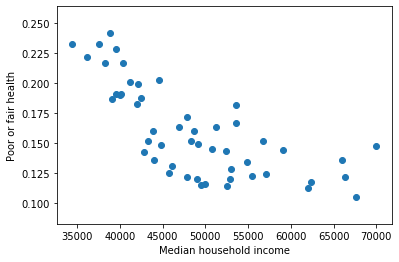

In [25]:
import matplotlib.pyplot as plt

# Get averages for numeric variables aggregated by state. 
states = df.groupby("State").mean().reset_index()

# Select specific columns to visualize.
states = states[["State","Poor or fair health","Median household income"]]

# Create a scatterplot. We tell matplotlib which columns to use on each axis.
plt.scatter(x = states["Median household income"],
            y = states["Poor or fair health"])

# Label the axes.
plt.xlabel("Median household income")
plt.ylabel("Poor or fair health")

&nbsp;

### Seaborn example

Here's an example `seaborn` plot with our County Health Data from above:

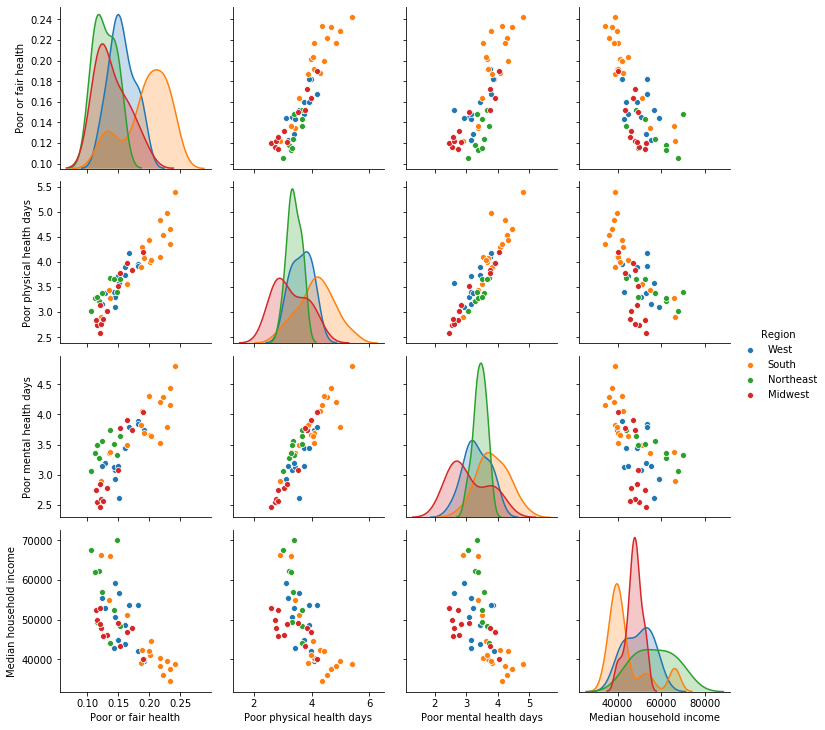

In [26]:
import seaborn as sns

# Get averages for numeric variables aggregated by state and region. 
states2 = df.groupby(["State","Region"]).mean().reset_index()

# Select specific columns to visualize.
states2 = states2[["Region","Poor or fair health","Poor physical health days","Poor mental health days","Median household income"]]

#Seaborn can plot a grid of pairwise relationships. In these plots, we'll make each region a different color.
sns.pairplot(states2, hue = "Region")

&nbsp;

### plotnine example

The `plotnine` package brings the functionality of R's ggplot2 package into Python.  If you're already familiar with ggplot syntax from R, it's probably the easiest way to start plotting in Python.

Install `plotnine` from `conda-forge` using:  
```
conda install -c conda-forge plotnine
```
In your anaconda terminal.

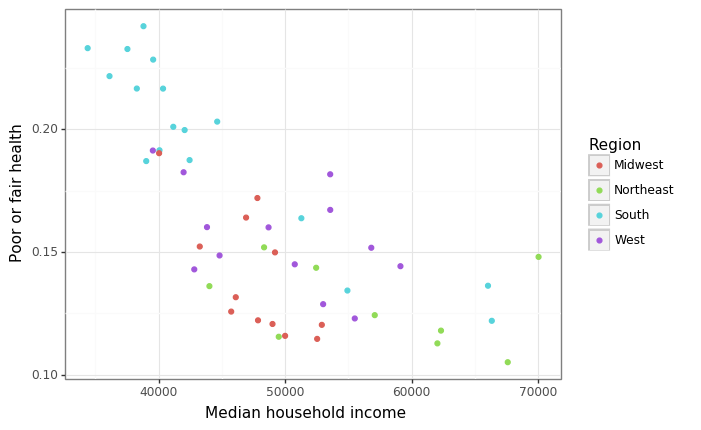

<ggplot: (-9223371879592311338)>

In [27]:
from plotnine import * 
#Using this syntax means we won't have to refer to functions from plotnine with plotnine.<function>
#This makes plotnine code even more similar to R's ggplot functions

(ggplot(data = states2,mapping = aes(x = "Median household income",
                                    y = "Poor or fair health",
                                    color = "Region"))
+geom_point()
+theme_bw())

&nbsp;

## "Big Data" and iteration in pandas 

Pandas can also read csvs in smaller chunks to help deal with files that are too large to be read into RAM.  

In the code below, setting `chunksize` and `iterator=True` generates a flow of 1000 row chunks out of the main dataset.  This isn't really necessary in our 6109 row dataset, but might be critical to working with a 61 million row dataset.

In [28]:
#Create an empty list for storing chunks.
chunk_list = []

#Read in 1000 rows at a time and store only NC rows as separate chunks in chunk_list.
for chunk in pd.read_csv("CountyHealthData_2014-2015.csv", chunksize=1000, iterator=True):
    nc_rows = chunk[chunk["State"]=="NC"]
    chunk_list.append(nc_rows)

#Combine NC chunks into single data frame and view top rows.
nc_df = pd.concat(chunk_list, ignore_index=True)
nc_df.head()

,State,Region,Division,County,FIPS,GEOID,SMS Region,Year,Premature death,Poor or fair health,...,Drug poisoning deaths,Uninsured adults,Uninsured children,Health care costs,Could not see doctor due to cost,Other primary care providers,Median household income,Children eligible for free lunch,Homicide rate,Inadequate social support
0,NC,South,South Atlantic,Alamance County,37001,37001,Region 20,1/1/2014,7123.0,0.192,...,10.48,0.259,0.073,8640.0,0.167,46.0,41394,0.444,4.94,0.202
1,NC,South,South Atlantic,Alamance County,37001,37001,Region 20,1/1/2015,7291.0,0.192,...,12.38,0.249,0.088,9050.0,0.167,56.0,43001,0.455,4.60,NaN
2,NC,South,South Atlantic,Alexander County,37003,37003,Region 20,1/1/2014,7974.0,0.178,...,22.74,0.240,0.077,9316.0,0.205,30.0,39655,0.417,6.27,0.273
3,NC,South,South Atlantic,Alexander County,37003,37003,Region 20,1/1/2015,8079.0,0.178,...,24.04,0.239,0.076,9242.0,0.205,32.0,46064,0.449,7.20,NaN
4,NC,South,South Atlantic,Alleghany County,37005,37005,Insuff Data,1/1/2014,8817.0,0.234,...,18.18,0.320,0.131,9585.0,0.210,55.0,34046,0.523,NaN,0.215


&nbsp;

###  Alternative: The `csv` package

Python also comes packaged with package for reading Comma Separated Values (csv) files.  This can sometimes be easier to work with if you don't need the extra functionality of `pandas` or would prefer base Python objects to work wtih!

In [29]:
import csv

This package provides two major ways to read csv files:

* `csv.reader`: reads the csv into a list of lists where each row is represented by a list within a master list object.
* `csv.DictReader`: reads the csv into a list of **dicts** where each row is a dictionary with keys derived from the first row of the dataset.

The syntax for each command is similar:

In [30]:
list_of_lists = []
with open("CountyHealthData_2014-2015.csv","r") as csvfile:
    reader=csv.reader(csvfile)
    for row in reader:
        list_of_lists.append(row)

In [31]:
list_of_dicts = []
with open("CountyHealthData_2014-2015.csv","r") as csvfile:
    reader=csv.DictReader(csvfile)
    for row in reader:
        list_of_dicts.append(row)

Notice that each process reads the csv in row by row - this can be easily adapted with an `if` condition to filter out specific rows from a dataset that might be too large to open all at once.

Let's take a look at the differences between the output from each of these processes.

In [32]:
print(list_of_lists[1])

['AK', 'West', 'Pacific', 'Aleutians West Census Area', '2016', '02016', 'Insuff Data', '1/1/2014', '', '0.122', '2.1', '2.1', '', '0.267', '0.3', '7.002', '0.234', '0.896', '0.266', '', '290.7', '21.1', '0.355', '91', '50', '99', '', '', '', '', '0.466', '0.091', '0.087', '', '0.289', '', '322.06', '', '', '0.03', '0.221', '0.272', '0', '5547', '0.078', '1', '0.067', '', '181', '', '', '0.17', '0.075', '', '', '0.374', '0.25', '3791', '0.185', '216', '69192', '0.127', '', '0.287']


In [33]:
print(list_of_dicts[1])

OrderedDict([('State', 'AK'), ('Region', 'West'), ('Division', 'Pacific'), ('County', 'Aleutians West Census Area'), ('FIPS', '2016'), ('GEOID', '02016'), ('SMS Region', 'Insuff Data'), ('Year', '1/1/2015'), ('Premature death', ''), ('Poor or fair health', '0.122'), ('Poor physical health days', '2.1'), ('Poor mental health days', '2.1'), ('Low birthweight', '0.04'), ('Adult smoking', '0.267'), ('Adult obesity', '0.329'), ('Food environment index', '6.6'), ('Physical inactivity', '0.22'), ('Access to exercise opportunities', '0.896'), ('Excessive drinking', '0.266'), ('Alcohol-impaired driving deaths', ''), ('Sexually transmitted infections', '288.4'), ('Teen births', '21.6'), ('Uninsured', '0.293'), ('Primary care physicians', '36'), ('Dentists', '73'), ('Mental health providers', '163'), ('Preventable hospital stays', ''), ('Diabetic screening', ''), ('Mammography screening', ''), ('High school graduation', ''), ('Some college', '0.474'), ('Unemployment', '0.088'), ('Children in pove

Read more about the `csv` package here: https://docs.python.org/3/library/csv.html